In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.animation import FuncAnimation, FFMpegWriter
import torch
import os

# Manually set the path to FFmpeg executable
rcParams['animation.ffmpeg_path'] = r'C:\ffmpeg\bin\ffmpeg.exe'
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 16


In [3]:
def plot_animation(prediction, id, output_dir, title='u_prediction', colormap='jet', vmin=None, vmax=None):
    prediction = prediction.cpu().numpy()
    N_frames = prediction.shape[0]

    # Initialize figure
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')

    # Set vmin and vmax if not provided
    if vmin is None:
        vmin = prediction.min().item()
    if vmax is None:
        vmax = prediction.max().item()

    # Initial frame
    im = ax.pcolor(prediction[0, 0, :, :], cmap=colormap, vmin=vmin, vmax=vmax)
    ax.set_title(title)
    fig.colorbar(im, ax=ax)

    def update_frame(frame):
        ax.pcolor(prediction[frame, 0, :, :], cmap=colormap, vmin=vmin, vmax=vmax)
        return [ax]

    ani = FuncAnimation(fig, update_frame, frames=range(0, N_frames), blit=False)

    # Set file name dynamically
    filename = f"{id}_{title}.gif"
    writer = FFMpegWriter(fps=5)
    print(f"Saving animation as {filename}")
    ani.save(os.path.join(output_dir, filename), writer=writer, dpi=50, savefig_kwargs={'transparent': True})

    plt.show()

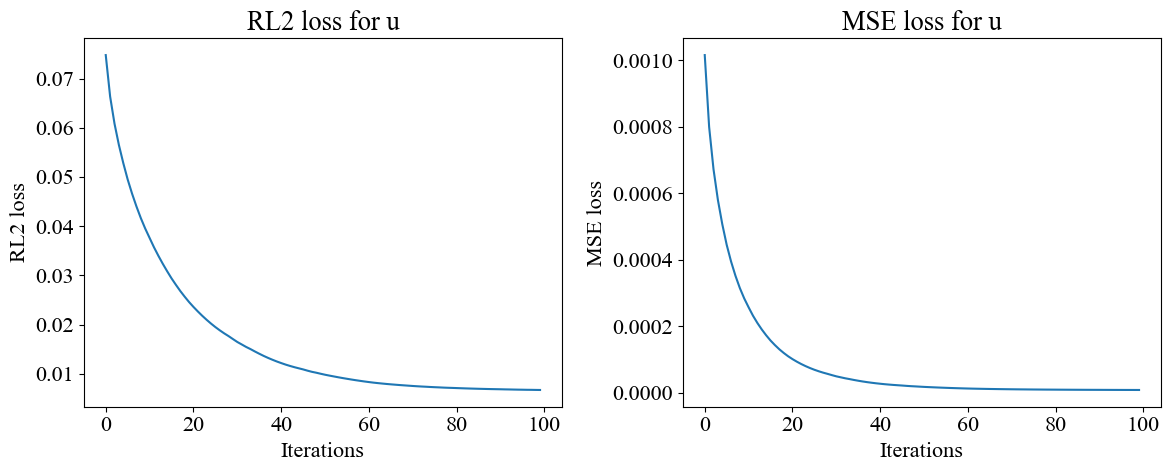

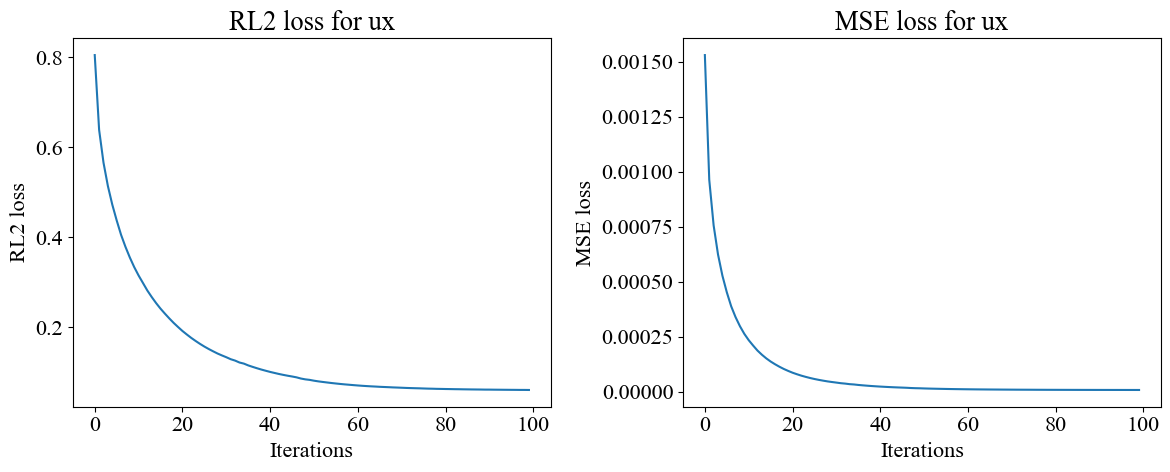

In [8]:
id = 'r129-10by10-rand-ux'
predict_ux = True
log_file = './Results/log-{}.txt'.format(id)
with open(log_file, 'r') as f:
    lines = f.readlines()

# extract the RL2 and MSE loss values from the last 100 lines of the log file
RL2_loss_u = []
MSE_loss_u = []
RL2_loss_ux = []
MSE_loss_ux = []
for line in lines[-100:]:
    line = eval(line)
    RL2_loss_u.append(float(line['u(L2)']))
    MSE_loss_u.append(float(line['u(MSE)']))
    if predict_ux:
        RL2_loss_ux.append(float(line['ux(L2)']))
        MSE_loss_ux.append(float(line['ux(MSE)']))

# plot 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(RL2_loss_u)
ax[0].set_title('RL2 loss for u')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('RL2 loss')
ax[1].plot(MSE_loss_u)
ax[1].set_title('MSE loss for u')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('MSE loss')
plt.tight_layout()

if predict_ux:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].plot(RL2_loss_ux)
    ax[0].set_title('RL2 loss for ux')
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('RL2 loss')
    ax[1].plot(MSE_loss_ux)
    ax[1].set_title('MSE loss for ux')
    ax[1].set_xlabel('Iterations')
    ax[1].set_ylabel('MSE loss')
    plt.tight_layout()

plt.show()


prediction: torch.Size([101, 1, 305, 393])
target: torch.Size([1, 305, 393])
error: torch.Size([101, 1, 305, 393])
Saving animation as r129-4by3-rand-ux_u_prediction.gif


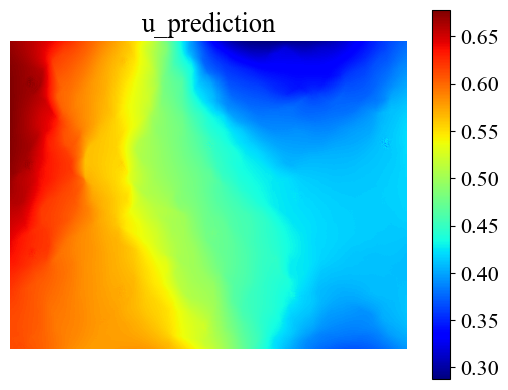

Saving animation as r129-4by3-rand-ux_u_error.gif


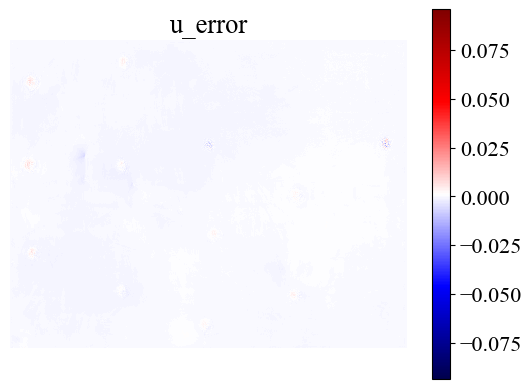

In [5]:
output_dir = './Examples/'
os.makedirs(output_dir, exist_ok=True)

id = 'r129-4by3-rand-ux'
data_path = './Results/u_prediction-{}.pt'.format(id)
data = torch.load(data_path)
prediction = data['prediction']
target = data['target']
error = prediction - target.unsqueeze(0)
min_value = target.min().item()
max_value = target.max().item()
print('prediction:', prediction.shape)
print('target:', target.shape)
print('error:', error.shape)

plot_animation(prediction[::5], id, output_dir, title='u_prediction', vmin=min_value, vmax=max_value)
plot_animation(error[::5], id, output_dir, title='u_error', colormap='seismic')

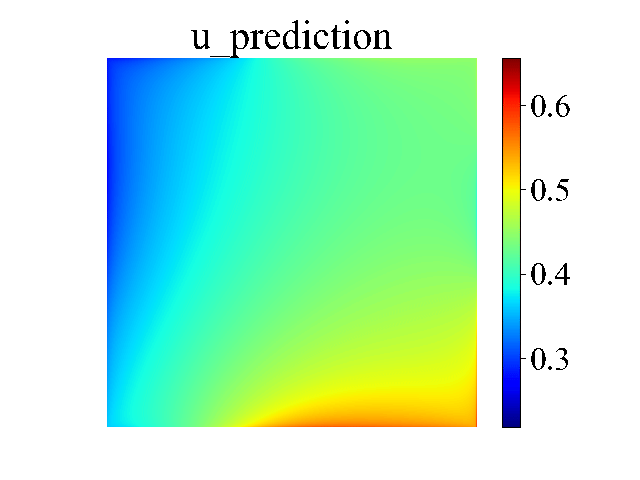

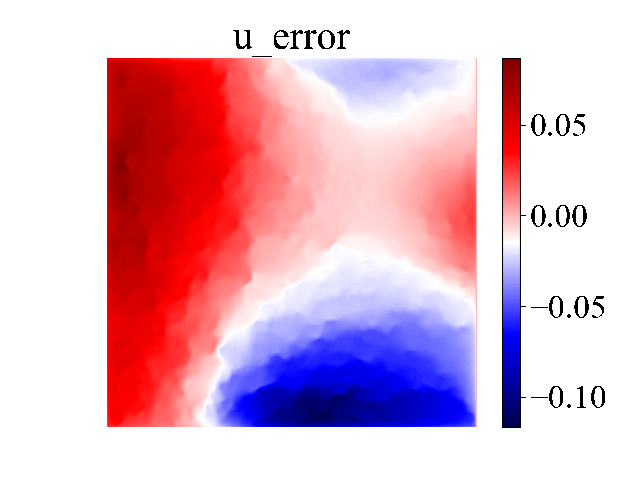

In [7]:
from IPython.display import display, Image

id = 'r129-10by10-rand-ux'
display(Image(filename="{}/{}_u_prediction.gif".format(output_dir, id)))
display(Image(filename="{}/{}_u_error.gif".format(output_dir, id)))